# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the data and selecting features

## Import data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

## Explore data

In [3]:
loan_data_inputs_train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,A5,...,1,0,0,1,0,0,0,0,0,0
206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,C1,...,0,0,0,1,0,0,0,0,0,0
136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,A5,...,0,0,0,1,0,0,0,0,0,0
412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,D1,...,0,0,0,1,0,0,0,0,0,0
36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,C2,...,0,1,0,1,0,0,0,0,0,0


In [4]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [5]:
loan_data_inputs_train.shape

(373028, 323)

In [6]:
loan_data_targets_train.shape

(373028, 1)

In [7]:
loan_data_inputs_test.shape

(93257, 323)

In [8]:
loan_data_targets_test.shape

(93257, 1)

In [9]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logsitic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
# Creating an object of the LogisticRegression class 

reg = LogisticRegression()

In [14]:
# Make sure all the rows are printed 

pd.options.display.max_rows = None

In [15]:
# Fitting our data to reg

reg.fit(inputs_train, loan_data_targets_train)

/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
reg.intercept_

array([-1.04220132])

In [17]:
reg.coef_

array([[ 4.18713875e-01,  3.94052108e-01,  3.23577450e-01,
         2.88527928e-01,  2.44150177e-01,  8.90254628e-02,
         1.06391158e-01,  1.06497411e-01,  3.22568096e-02,
         5.67780696e-02,  5.84358932e-02,  5.38143671e-02,
         7.55858512e-02,  1.37580118e-01,  9.70739809e-02,
         1.78709991e-01,  2.42904311e-01,  2.24727757e-01,
         2.64968077e-01,  3.24163073e-01,  5.24234520e-01,
         1.30174279e-01,  7.49941145e-02,  3.02371551e-01,
         2.12493300e-01,  2.26538213e-01,  2.69754191e-01,
         1.42625285e-01,  4.21697667e-02,  7.85873916e-02,
         1.01176256e-01,  4.77482061e-02,  4.04793640e-02,
         1.07350921e-01,  1.04368062e+00,  6.72339248e-01,
         5.62684364e-01,  4.49804487e-01,  4.83326756e-01,
         4.77580812e-01,  5.80767941e-01,  1.60593120e+00,
         1.04671078e+00,  6.92730642e-01,  2.84369443e-01,
        -8.49203100e-03, -2.94010547e-02,  5.34298822e-02,
         3.89330261e-02,  3.21504953e-02,  4.41002628e-0

In [18]:
# Now, we have to extract and format the results

feature_name = inputs_train.columns.values

In [19]:
# Now, we create a df with the feature names and their corresponding coefficients 

summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Adding one row at the beginning 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.042201
1,grade:A,0.418714
2,grade:B,0.394052
3,grade:C,0.323577
4,grade:D,0.288528
5,grade:E,0.244150
6,grade:F,0.089025
7,home_ownership:OWN,0.106391
8,home_ownership:MORTGAGE,0.106497
9,addr_state:NM_VA,0.032257


# Building a Logistic Regression Model with p-values

In [20]:
# The built in methods for calculating p-values in sklearn are univariate
# That is, they calculate the statistical significance for each variable as though the others don't exist 
# One of the cleanest ways to find the multi-variate p-values is by altering the fit() method


from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)
        # Initializes by inheriting everything from the original LogsiticRegression class

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1 # Adding one row at the beginning 
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.042201
1,grade:A,0.418714
2,grade:B,0.394052
3,grade:C,0.323577
4,grade:D,0.288528
5,grade:E,0.244150
6,grade:F,0.089025
7,home_ownership:OWN,0.106391
8,home_ownership:MORTGAGE,0.106497
9,addr_state:NM_VA,0.032257


In [24]:
p_values = reg.p_values
p_values

[2.2270694947486424e-06,
 5.147449075047065e-11,
 7.237501212442528e-09,
 6.800629835599768e-08,
 3.6642275370928183e-07,
 0.07516957519301502,
 1.2550417741268903e-07,
 3.9527167316600843e-17,
 0.3134620083882632,
 0.01912948523269929,
 0.01161771808911209,
 0.01112075045917999,
 0.0024019628424659274,
 1.0248050172537077e-09,
 0.0011359122628500297,
 2.0419753876891633e-11,
 3.070870114294283e-07,
 4.93417850929472e-18,
 1.1365261742216292e-19,
 6.790566127543176e-26,
 7.763761848559186e-23,
 5.6365006659084425e-19,
 1.276169171824355e-08,
 1.8943867730684043e-26,
 4.1024146897890334e-16,
 3.49412854549974e-13,
 7.034354242151926e-18,
 8.76971190548603e-29,
 0.0028638231483536602,
 0.002417875110493044,
 8.042778581573976e-08,
 0.02537875528791293,
 0.05124358368734515,
 5.5269804893092324e-09,
 9.37727910285358e-50,
 9.772849380822565e-19,
 1.8555550539309695e-13,
 6.552736901549919e-10,
 4.909470680108568e-10,
 5.25793540704421e-11,
 5.873110856664521e-15,
 1.0364054514113353e-105,

In [25]:
# Above, we don't have a p-value for the intercept. In order to match the p-value to the coefficients, 

p_values = np.append(np.nan, np.array(p_values))
p_values

array([            nan, 2.22706949e-006, 5.14744908e-011, 7.23750121e-009,
       6.80062984e-008, 3.66422754e-007, 7.51695752e-002, 1.25504177e-007,
       3.95271673e-017, 3.13462008e-001, 1.91294852e-002, 1.16177181e-002,
       1.11207505e-002, 2.40196284e-003, 1.02480502e-009, 1.13591226e-003,
       2.04197539e-011, 3.07087011e-007, 4.93417851e-018, 1.13652617e-019,
       6.79056613e-026, 7.76376185e-023, 5.63650067e-019, 1.27616917e-008,
       1.89438677e-026, 4.10241469e-016, 3.49412855e-013, 7.03435424e-018,
       8.76971191e-029, 2.86382315e-003, 2.41787511e-003, 8.04277858e-008,
       2.53787553e-002, 5.12435837e-002, 5.52698049e-009, 9.37727910e-050,
       9.77284938e-019, 1.85555505e-013, 6.55273690e-010, 4.90947068e-010,
       5.25793541e-011, 5.87311086e-015, 1.03640545e-105, 2.12645771e-126,
       1.06339117e-083, 4.61362646e-023, 6.75830806e-001, 7.30789645e-002,
       3.47955402e-002, 7.34825238e-002, 2.19957265e-001, 4.37041579e-001,
       9.34795336e-001, 9

In [26]:
# Adding to the summary table 

summary_table['p_values'] = p_values

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.042201,NaN
1,grade:A,0.418714,2.227069e-06
2,grade:B,0.394052,5.147449e-11
3,grade:C,0.323577,7.237501e-09
4,grade:D,0.288528,6.800630e-08
5,grade:E,0.244150,3.664228e-07
6,grade:F,0.089025,7.516958e-02
7,home_ownership:OWN,0.106391,1.255042e-07
8,home_ownership:MORTGAGE,0.106497,3.952717e-17
9,addr_state:NM_VA,0.032257,3.134620e-01


In [28]:
# Now, we want to only retain variables with coefficients that are statistically significant 
# However, some categories are represented by multiple dummy variables 
# If we remove only some representing a larger variable, it removes a certain portion of the data and skews it 
# So, if one is statistically significant from each category, we retain all
# Conventionally, if p-value < 0.05, we conclude that the coeff of a variable is statistically significant 

inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [29]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/shrutisrinivasan/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.146503
1,grade:A,0.411493
2,grade:B,0.390396
3,grade:C,0.322942
4,grade:D,0.291240
5,grade:E,0.253188
6,grade:F,0.100436
7,home_ownership:OWN,0.109199
8,home_ownership:MORTGAGE,0.105850
9,addr_state:NM_VA,0.032000


In [34]:
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.146503,NaN
1,grade:A,0.411493,3.211056e-06
2,grade:B,0.390396,6.222099e-11
3,grade:C,0.322942,5.997349e-09
4,grade:D,0.291240,3.668406e-08
5,grade:E,0.253188,7.013955e-08
6,grade:F,0.100436,3.950865e-02
7,home_ownership:OWN,0.109199,5.523111e-08
8,home_ownership:MORTGAGE,0.105850,4.519025e-17
9,addr_state:NM_VA,0.032000,3.168545e-01


In [35]:
import pickle

In [36]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

In [37]:
# The exponential of a coefficient of a dummy variable shows the change in the odds for an event occuring 
# between an observation with a zero value for that dummy variable and an observation with a value of 1 for that 
# dummy variable 

# Therefore, higher coefficients mean greater odds of being a good borrower in this model

# If an observation belongs to a reference category, it will have values of 0 for all other dummy variables that 
# represent an original independent variable 
# So, the odds of being good for that observation compared to an observation that belonged to another category will 
# be an exponenent to the power of 0

In [38]:
# Let us take the grade variable 
# In terms of woe in reference to the good-bad variable, A is the best one and G is the worst
# So, we chose G as a reference category
# We got all positive coeffs for the variables A-F. That means observations with these values are all better than 
# observations with a rating of G 

# What are the odds of someone with an external rating of D to be better than one with G?
# The answer is an exponenent raised to the power the coefficient of the dummy variable D
# We pretend the reference category has a regression coefficient of 0 here 
# It serves as a comparison 
# The odds for someone with B to be good compared to someone with D is an exponent raised to the power of the coeff
# of B minus the coeff of D

# Direct comparisons are possible only between categories coming from the same original independent variable 

# PD Model Validation

In [39]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>=86']]

In [40]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [41]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [42]:
y_hat_test = reg2.model.predict(inputs_test)

In [43]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [45]:
# Here, the first element is the probability of default and the second is the probability of non-default

y_hat_test_proba

array([[0.09428761, 0.90571239],
       [0.19149664, 0.80850336],
       [0.11541136, 0.88458864],
       ...,
       [0.02375643, 0.97624357],
       [0.0384747 , 0.9615253 ],
       [0.0339892 , 0.9660108 ]])

In [46]:
# Creating a new array in which each element is equal to the second element of these arrays 

y_hat_test_proba[: ][: , 1]

array([0.90571239, 0.80850336, 0.88458864, ..., 0.97624357, 0.9615253 ,
       0.9660108 ])

In [47]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [48]:
y_hat_test_proba

array([0.90571239, 0.80850336, 0.88458864, ..., 0.97624357, 0.9615253 ,
       0.9660108 ])

In [49]:
# For convenience, we can put the actual good_bad variable and the estimated probabilities in one dataframe 

loan_data_targets_test_temp = loan_data_targets_test

In [50]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [51]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [52]:
df_actual_predicted_probs.shape

(93257, 2)

In [53]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [54]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [55]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.905712
288564,1,0.808503
213591,1,0.884589
263083,1,0.920040
165001,1,0.977030


# Accuracy and Area Under the Curve 

In [57]:
# Setting cutoff threshold 

tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

# Now, this column contains the predictions using this threshold

In [58]:
# Creating a confusion matrix for these predictions 

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,6,10184
1,9,83058


In [59]:
# A confusion matrix can also tell the accuracy of the model

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.000064,0.109204
1,0.000097,0.890636


In [60]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.8906998938417492

In [63]:
# The overall accuracy is around 89%
# Looking at the confusion matrix, of all the ones that are actually bad borrwers, only 6 are correctly predicted
# Over 10,000 are wrongly predicted
# So, under a threshold of 0.5, there are a lot of false positives
# So, a more conservative threshold needs to be set
# We change to 0.9 and re-run the code

In [64]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [65]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], 
            rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7363,2827
1,36354,46713


In [66]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078954,0.030314
1,0.389826,0.500906


In [67]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5798599568933164

In [68]:
# The accuracy is found to be a lot lower
# The confusion matrix is better for the actual of 0, but worse for the value of 1
# So, 0.9 is too conservative

In [ ]:
# The accuracy alone is not a good measure of what threshold to set. We also have to consider the false positives and 
# true positives rates. 
# We can do this by checking the false pos rate for all thresholds and true pos rate for all thresholds

In [ ]:
# In ML, the curve that shows the rates of the true positive predictors is called the Reciever Operating Characteristic
# Curve, or ROC curve 

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99990186, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 4.45423574e-04, ...,
        9.99987962e-01, 9.99987962e-01, 1.00000000e+00]),
 array([1.9898443 , 0.9898443 , 0.98638018, ..., 0.39346822, 0.3841576 ,
        0.38209568]))

In [ ]:
# The first array contains the falso pos rates
# The second contains the true pos rates
# The third contains the thresholds

In [71]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [72]:
# Plotting these, 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

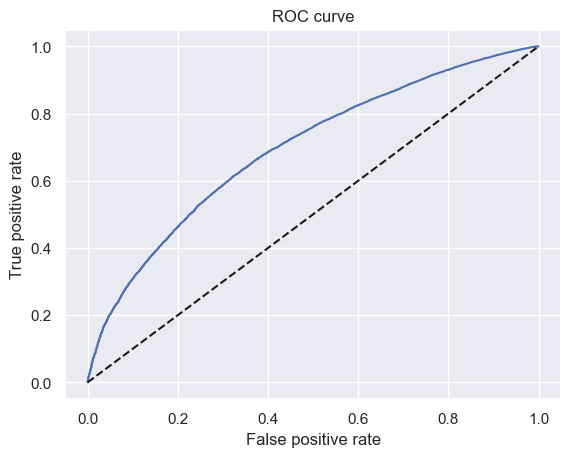

In [75]:
plt.plot(fpr, tpr) # ROC Curve
plt.plot(fpr, fpr, linestyle = '--', color = 'k') # Benchmark (predicting by chance)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [74]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.6955618638030738

# Gini and Kolmogorov-Smrinov Coefficient

In [ ]:
# In the context of this model, the Gini coefficient is used to measure inequality between non-defaulted and defaulted
# It is measured by plotting the cumulative % of defaulted as a function of the cumulative % of all borrowers
# The borrowers must be in ascending order of estimated probability of being good 

# The Kolmogorov-Smirnov coeff shows to what extent the model separates the good from the bad
# It is measured by looking at the cumulative distributions of actual good borrowers and actual bad borrowers with 
# respect to the estimated probability of being good or bad by our model

In [76]:
# Ordering the dataframes in ascending order for Gini 

df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [77]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
42341,1,0.382096,0
39810,0,0.384158,0
41742,1,0.393468,0
41663,1,0.411998,0
41760,1,0.426132,0


In [78]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
284281,1,0.988294,1
239228,1,0.988389,1
148031,1,0.988655,1
306808,1,0.989177,1
242624,1,0.989844,1


In [79]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [80]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.382096,0
1,39810,0,0.384158,0
2,41742,1,0.393468,0
3,41663,1,0.411998,0
4,41760,1,0.426132,0


In [83]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [84]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.382096,0,1,1,0
1,39810,0,0.384158,0,2,1,1
2,41742,1,0.393468,0,3,2,1
3,41663,1,0.411998,0,4,3,1
4,41760,1,0.426132,0,5,4,1


In [85]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [86]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.382096,0,1,1,0,0.000011,0.000012,0.000000
1,39810,0,0.384158,0,2,1,1,0.000021,0.000012,0.000098
2,41742,1,0.393468,0,3,2,1,0.000032,0.000024,0.000098
3,41663,1,0.411998,0,4,3,1,0.000043,0.000036,0.000098
4,41760,1,0.426132,0,5,4,1,0.000054,0.000048,0.000098


In [87]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,284281,1,0.988294,1,93253,83063,10190,0.999957,0.999952,1.0
93253,239228,1,0.988389,1,93254,83064,10190,0.999968,0.999964,1.0
93254,148031,1,0.988655,1,93255,83065,10190,0.999979,0.999976,1.0
93255,306808,1,0.989177,1,93256,83066,10190,0.999989,0.999988,1.0
93256,242624,1,0.989844,1,93257,83067,10190,1.000000,1.000000,1.0


Text(0.5, 1.0, 'Gini')

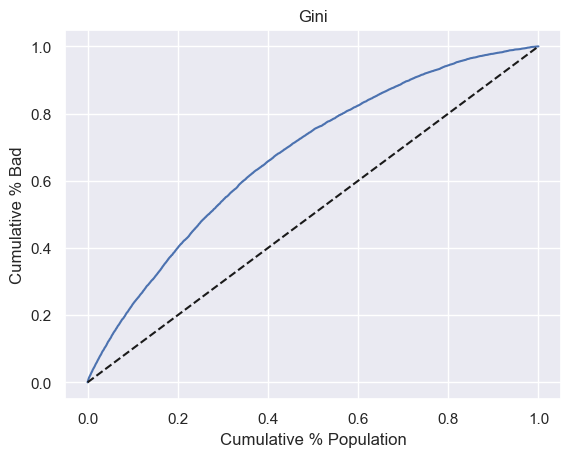

In [88]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [89]:
Gini = AUROC * 2 - 1
Gini

0.39112372760614766

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

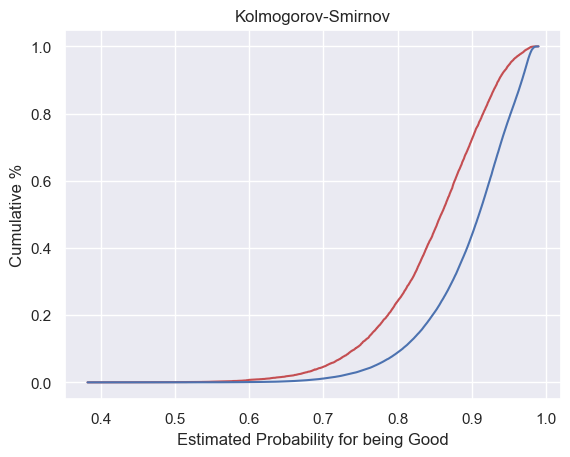

In [90]:
# Now measuring KS

plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [91]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2904123033544945

# Applying the PD Model

## Calculating the PD of individual accounts

In [92]:
pd.options.display.max_columns = None

In [93]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educ__sm_b__wedd__ren_en__mov__house,purpose:credit_card,purpose:debt_consolidation,purpose:oth__med__vacation,purpose:major_purch__car__home_impr,initial_list_status:f,initial_list_status:w,term:36,term:60,emp_length:0,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10,mths_since_issue_d:<38,mths_since_issue_d:38-39,mths_since_issue_d:40-41,mths_since_issue_d:42-48,mths_since_issue_d:49-52,mths_since_issue_d:53-64,mths_since_issue_d:65-84,mths_since_issue_d:>84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,int_rate:>20.281,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:141-164,mths_since_earliest_cr_line:165-247,mths_since_earliest_cr_line:248-270,mths_since_earliest_cr_line:271-352,mths_since_earliest_cr_line:>352,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,inq_last_6mths:>6,acc_now_delinq:0,acc_now_delinq:>=1,annual_inc:<20K,annual_inc:20K-30K,annual_inc:30K-40K,annual_inc:40K-50K,annual_inc:50K-60K,annual_inc:60K-70K,annual_inc:70K-80K,annual_inc:80K-90K,annual_inc:90K-100K,annual_inc:100K-120K,annual_inc:120K-140K,annual_inc:>140K,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,dti:>35,mths_since_last_delinq:Missing,mths_since_last_delinq:0-3,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>=86
362514,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [94]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.146503,NaN
1,grade:A,0.411493,3.211056e-06
2,grade:B,0.390396,6.222099e-11
3,grade:C,0.322942,5.997349e-09
4,grade:D,0.291240,3.668406e-08
5,grade:E,0.253188,7.013955e-08
6,grade:F,0.100436,3.950865e-02
7,home_ownership:OWN,0.109199,5.523111e-08
8,home_ownership:MORTGAGE,0.105850,4.519025e-17
9,addr_state:NM_VA,0.032000,3.168545e-01


In [95]:
y_hat_test_proba

array([0.90571239, 0.80850336, 0.88458864, ..., 0.97624357, 0.9615253 ,
       0.9660108 ])

In [ ]:
# For observation 362514, we first add the intercept, add it's grade coefficient, and keep adding the coefficients of
# the features where the value is 1. That gives us the log odds. ln((1-PD)/PD) = around 2.5
# (1-PD)/PD = exp(2.5) = 12.21
# 1-PD = 12.21/13.21
# 1-PD = 0.905 around (Prob of not deafulting)

# Creating a Scorecard

In [ ]:
# Banks create scorecards to make these models easier to interpret

In [96]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.146503,NaN
1,grade:A,0.411493,3.211056e-06
2,grade:B,0.390396,6.222099e-11
3,grade:C,0.322942,5.997349e-09
4,grade:D,0.291240,3.668406e-08
5,grade:E,0.253188,7.013955e-08
6,grade:F,0.100436,3.950865e-02
7,home_ownership:OWN,0.109199,5.523111e-08
8,home_ownership:MORTGAGE,0.105850,4.519025e-17
9,addr_state:NM_VA,0.032000,3.168545e-01


In [97]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [98]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [99]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.146503,NaN
1,1,grade:A,0.411493,3.211056e-06
2,2,grade:B,0.390396,6.222099e-11
3,3,grade:C,0.322942,5.997349e-09
4,4,grade:D,0.291240,3.668406e-08
5,5,grade:E,0.253188,7.013955e-08
6,6,grade:F,0.100436,3.950865e-02
7,7,home_ownership:OWN,0.109199,5.523111e-08
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17
9,9,addr_state:NM_VA,0.032000,3.168545e-01


In [100]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [101]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.146503,NaN,Intercept
1,1,grade:A,0.411493,3.211056e-06,grade
2,2,grade:B,0.390396,6.222099e-11,grade
3,3,grade:C,0.322942,5.997349e-09,grade
4,4,grade:D,0.291240,3.668406e-08,grade
5,5,grade:E,0.253188,7.013955e-08,grade
6,6,grade:F,0.100436,3.950865e-02,grade
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state


In [102]:
min_score = 300
max_score = 850

In [108]:
# Calculating the minimum credit worthiness

df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                     -1.146503
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.084860
dti                           -0.248194
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line   -0.027867
mths_since_issue_d             0.000000
mths_since_last_delinq         0.000000
mths_since_last_record        -0.116681
purpose                        0.000000
term                           0.000000
verification_status            0.000000
Name: Coefficients, dtype: float64

In [109]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-1.6241052317033113

In [110]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                     -1.146503
acc_now_delinq                 0.169558
addr_state                     0.511658
annual_inc                     0.566193
dti                            0.045636
emp_length                     0.108134
grade                          0.411493
home_ownership                 0.109199
initial_list_status            0.142755
inq_last_6mths                 0.695555
int_rate                       1.633946
mths_since_earliest_cr_line    0.057657
mths_since_issue_d             1.034478
mths_since_last_delinq         0.145424
mths_since_last_record         0.266987
purpose                        0.297305
term                           0.042115
verification_status            0.128479
Name: Coefficients, dtype: float64

In [111]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

5.22006823975611

In [112]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.146503,NaN,Intercept,-92.133350
1,1,grade:A,0.411493,3.211056e-06,grade,33.067725
2,2,grade:B,0.390396,6.222099e-11,grade,31.372381
3,3,grade:C,0.322942,5.997349e-09,grade,25.951692
4,4,grade:D,0.291240,3.668406e-08,grade,23.404121
5,5,grade:E,0.253188,7.013955e-08,grade,20.346273
6,6,grade:F,0.100436,3.950865e-02,grade,8.071095
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership,8.775240
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership,8.506164
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state,2.571552


In [113]:
# The score caluculation is very low for the intercept as it is not a dummy variable

In [114]:
# Calculatiing intercept score

df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

/var/folders/c7/k8g5240j0sg5hnv2yr82mp580000gn/T/ipykernel_65640/1548789711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.146503,NaN,Intercept,338.380273
1,1,grade:A,0.411493,3.211056e-06,grade,33.067725
2,2,grade:B,0.390396,6.222099e-11,grade,31.372381
3,3,grade:C,0.322942,5.997349e-09,grade,25.951692
4,4,grade:D,0.291240,3.668406e-08,grade,23.404121
5,5,grade:E,0.253188,7.013955e-08,grade,20.346273
6,6,grade:F,0.100436,3.950865e-02,grade,8.071095
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership,8.775240
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership,8.506164
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state,2.571552


In [115]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.146503,NaN,Intercept,338.380273,338.0
1,1,grade:A,0.411493,3.211056e-06,grade,33.067725,33.0
2,2,grade:B,0.390396,6.222099e-11,grade,31.372381,31.0
3,3,grade:C,0.322942,5.997349e-09,grade,25.951692,26.0
4,4,grade:D,0.291240,3.668406e-08,grade,23.404121,23.0
5,5,grade:E,0.253188,7.013955e-08,grade,20.346273,20.0
6,6,grade:F,0.100436,3.950865e-02,grade,8.071095,8.0
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership,8.775240,9.0
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership,8.506164,9.0
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state,2.571552,3.0


In [116]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [117]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel

849.0

In [120]:
# The score being 849 is due to the rounding. Let's fix it 

df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.146503,NaN,Intercept,338.380273,338.0,-0.380273,338.0
1,1,grade:A,0.411493,3.211056e-06,grade,33.067725,33.0,-0.067725,33.0
2,2,grade:B,0.390396,6.222099e-11,grade,31.372381,31.0,-0.372381,31.0
3,3,grade:C,0.322942,5.997349e-09,grade,25.951692,26.0,0.048308,26.0
4,4,grade:D,0.291240,3.668406e-08,grade,23.404121,23.0,-0.404121,23.0
5,5,grade:E,0.253188,7.013955e-08,grade,20.346273,20.0,-0.346273,20.0
6,6,grade:F,0.100436,3.950865e-02,grade,8.071095,8.0,-0.071095,8.0
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership,8.775240,9.0,0.224760,9.0
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership,8.506164,9.0,0.493836,9.0
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state,2.571552,3.0,0.428448,3.0


In [144]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][64] = 46
df_scorecard

/var/folders/c7/k8g5240j0sg5hnv2yr82mp580000gn/T/ipykernel_65640/551613714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][64] = 46


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.146503,NaN,Intercept,338.380273,338.0,-0.380273,338.0
1,1,grade:A,0.411493,3.211056e-06,grade,33.067725,33.0,-0.067725,33.0
2,2,grade:B,0.390396,6.222099e-11,grade,31.372381,31.0,-0.372381,31.0
3,3,grade:C,0.322942,5.997349e-09,grade,25.951692,26.0,0.048308,26.0
4,4,grade:D,0.291240,3.668406e-08,grade,23.404121,23.0,-0.404121,23.0
5,5,grade:E,0.253188,7.013955e-08,grade,20.346273,20.0,-0.346273,20.0
6,6,grade:F,0.100436,3.950865e-02,grade,8.071095,8.0,-0.071095,8.0
7,7,home_ownership:OWN,0.109199,5.523111e-08,home_ownership,8.775240,9.0,0.224760,9.0
8,8,home_ownership:MORTGAGE,0.105850,4.519025e-17,home_ownership,8.506164,9.0,0.493836,9.0
9,9,addr_state:NM_VA,0.032000,3.168545e-01,addr_state,2.571552,3.0,0.428448,3.0


In [145]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [146]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0